In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [4]:
heart = pd.read_csv('data/HeartDiseaseTrain-Test.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
print(heart.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


In [6]:
# Rename columns
heart.rename(columns={
    'resting_blood_pressure': 'trestbps',
    'cholestoral': 'chol',
    'Max_heart_rate': 'thalach',
    'chest_pain_type': 'cp',
    'fasting_blood_sugar': 'fbs',
    'rest_ecg': 'restecg',
    'exercise_induced_angina': 'exang',
    'vessels_colored_by_flourosopy': 'ca',
    'thalassemia': 'thal'
}, inplace=True)

# Define the numerical and categorical column groups
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Print to verify
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)
print("\nUpdated Columns in DataFrame:", heart.columns.tolist())

Numerical Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Updated Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


# 1. Distribution of Numerical Variables (Histogram, KDE, Box)

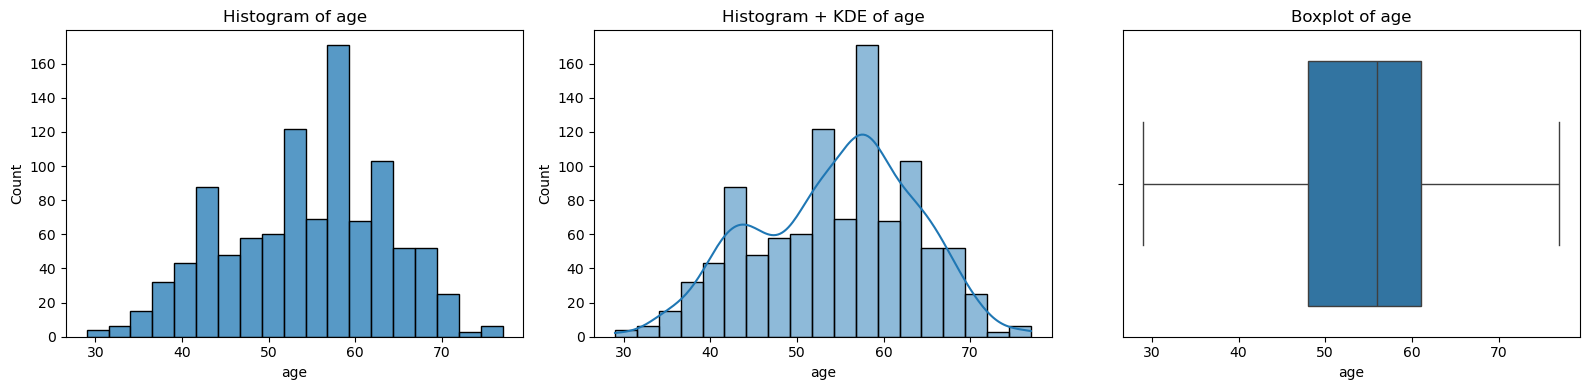

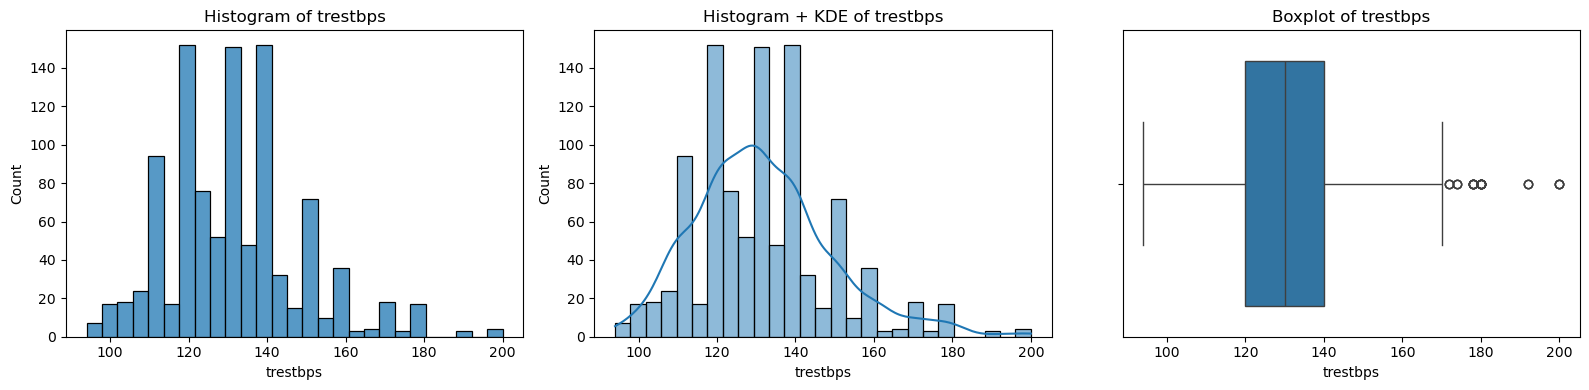

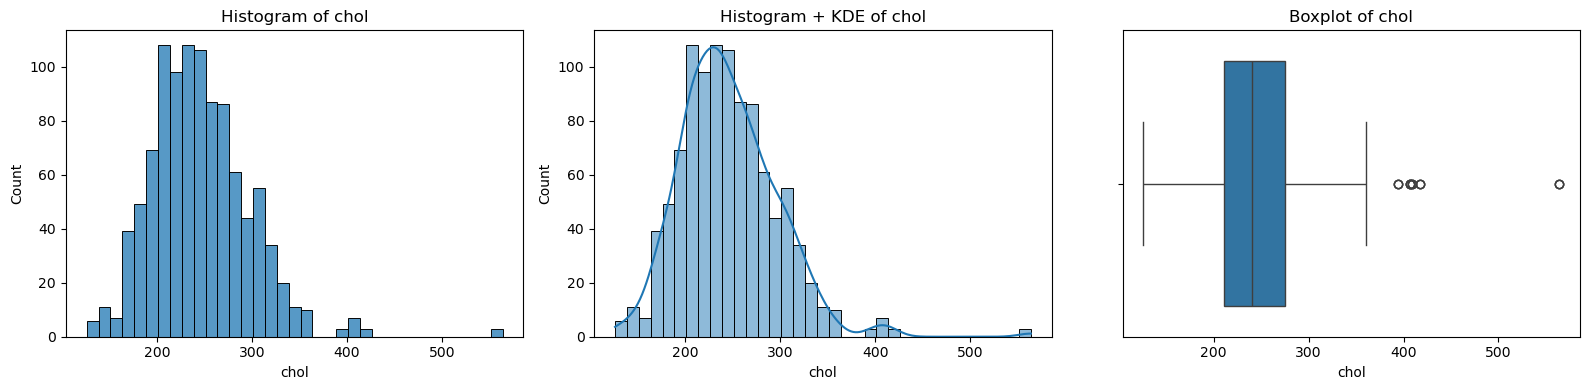

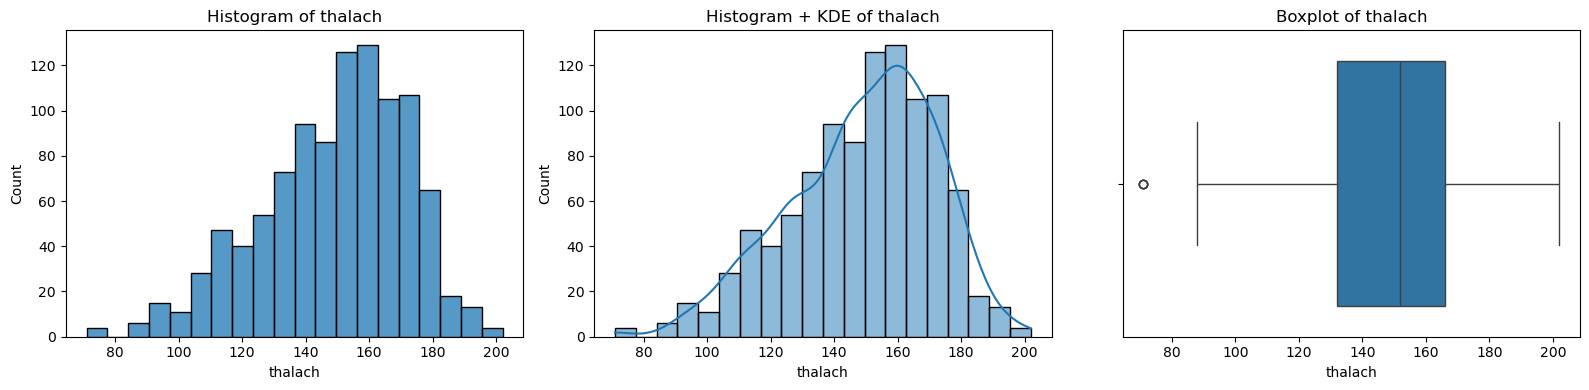

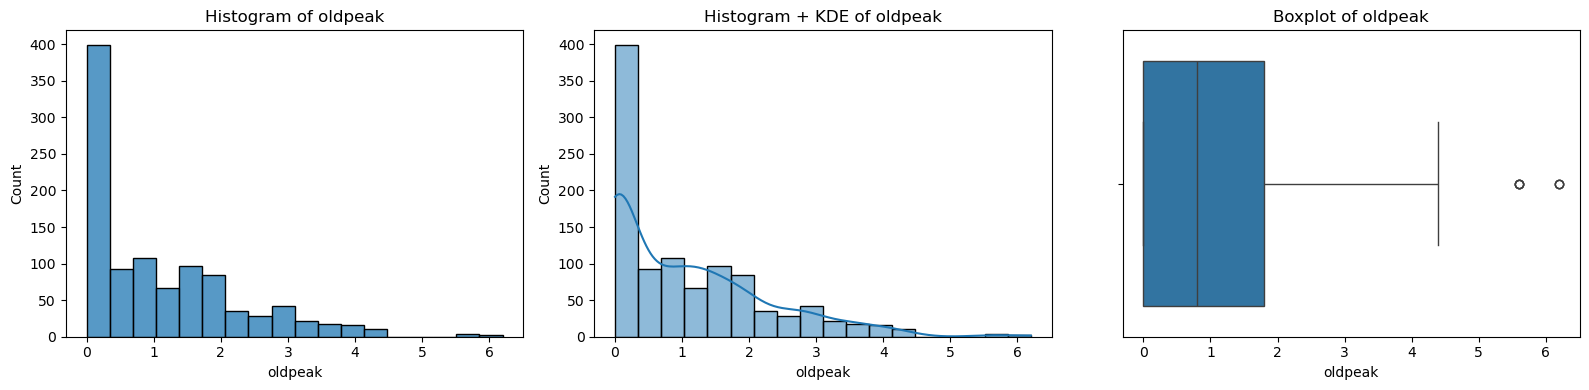

In [7]:
for col in num_cols:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(heart[col], kde=False)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 3, 2)
    sns.histplot(heart[col], kde=True)
    plt.title(f'Histogram + KDE of {col}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=heart[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# 2. Count plots for Categorical Variables

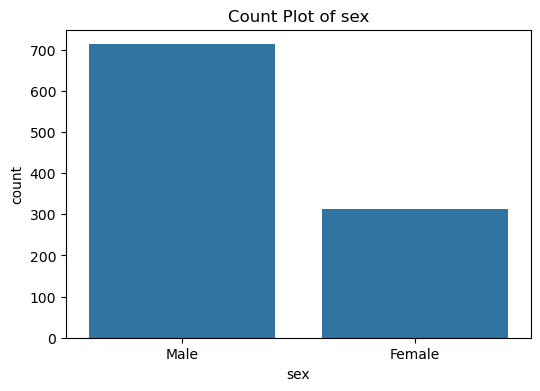

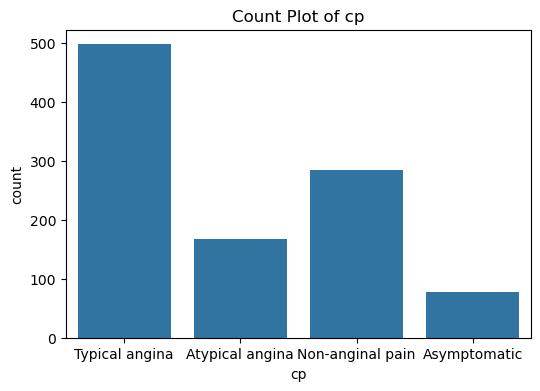

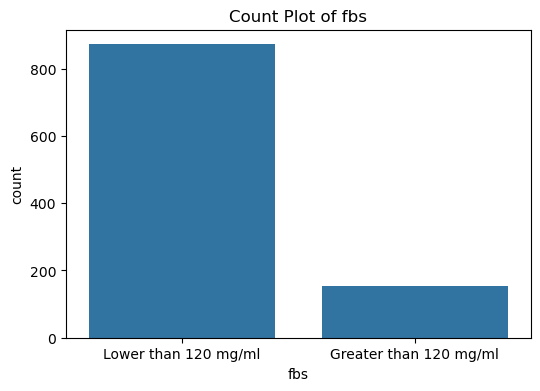

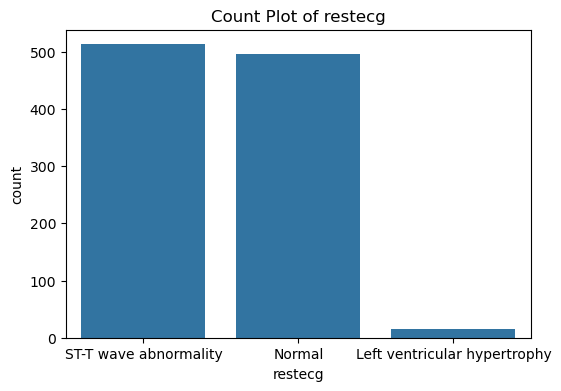

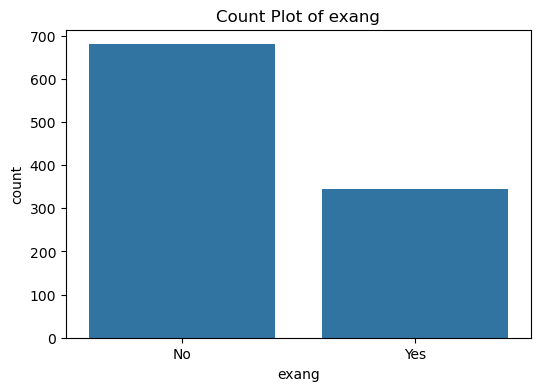

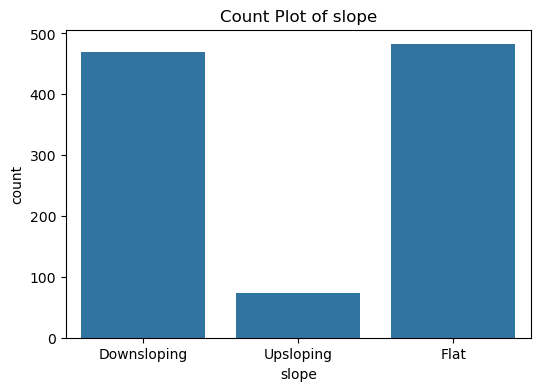

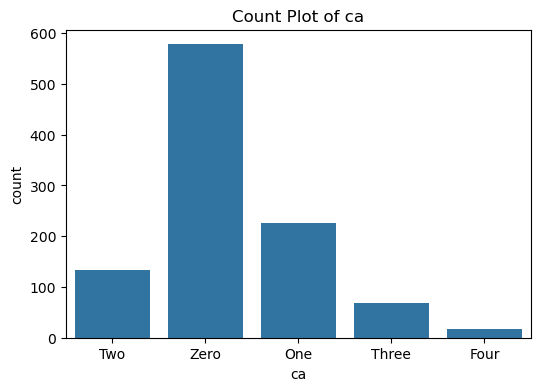

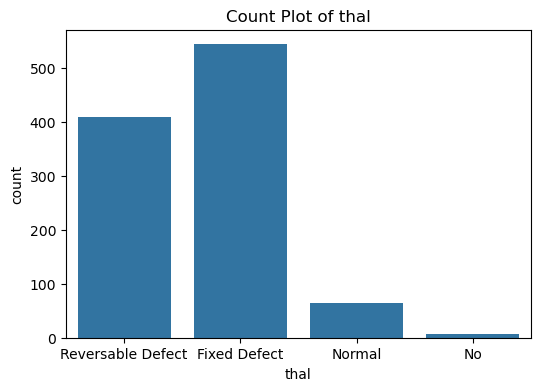

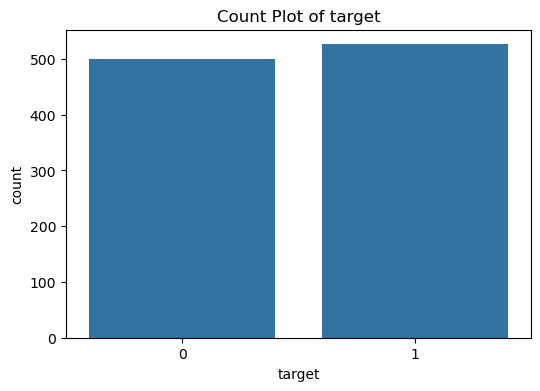

In [8]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=heart)
    plt.title(f'Count Plot of {col}')
    plt.show()

# 3. Bivariate: Numerical vs Numerical (Scatter)

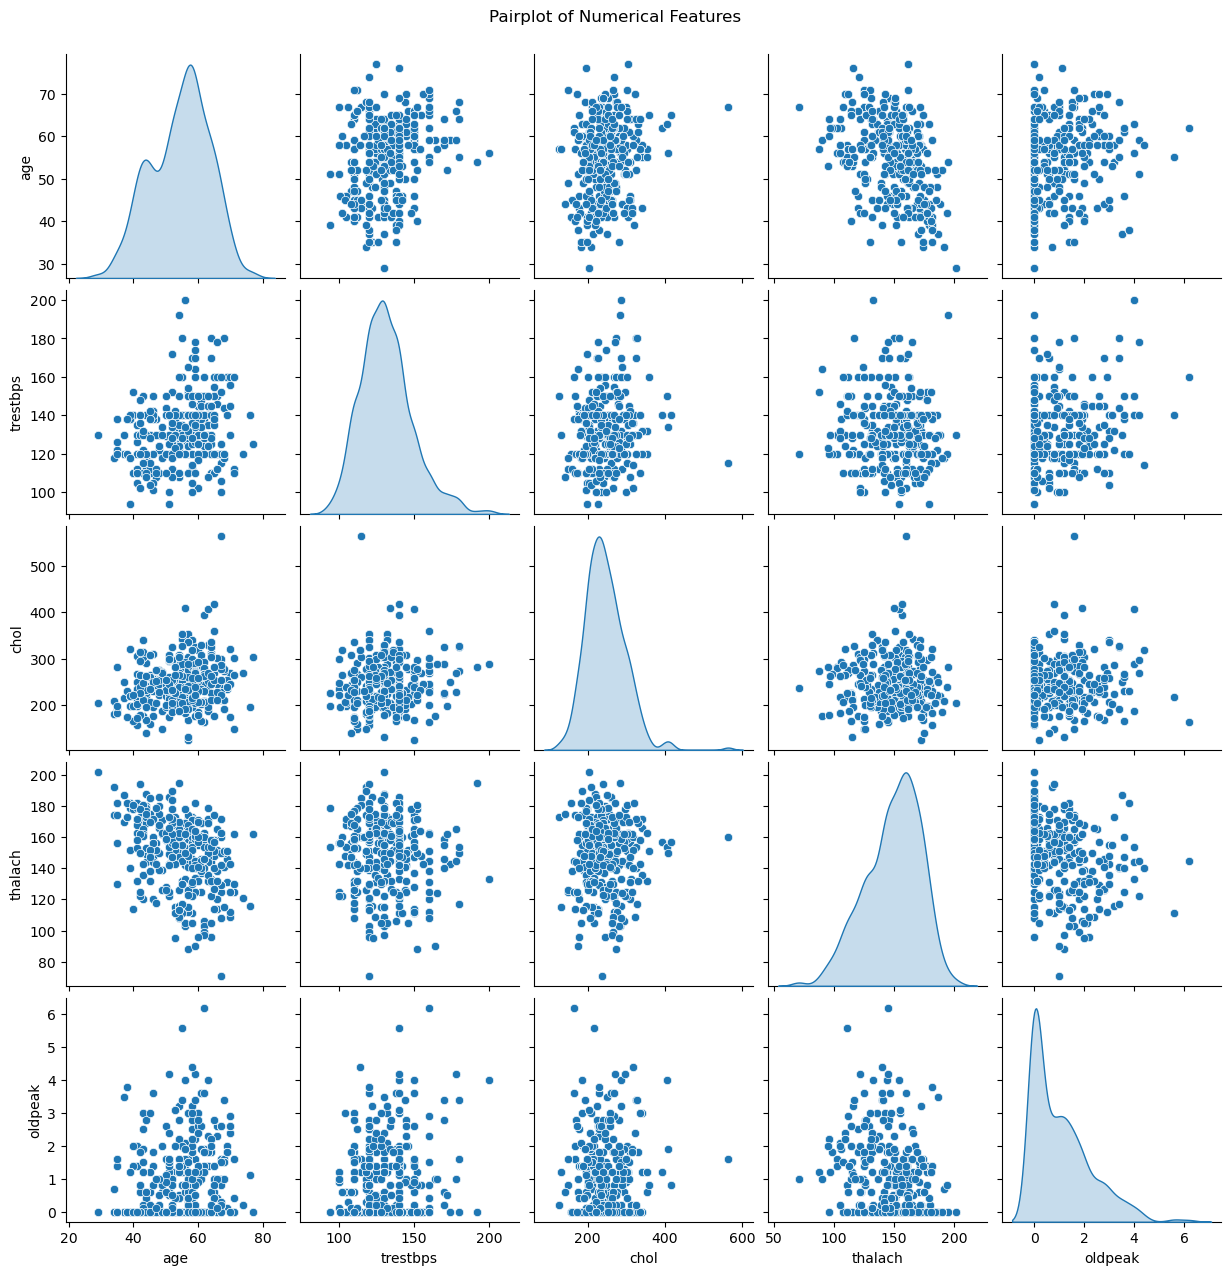

In [9]:
sns.pairplot(heart[num_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# 4. Bivariate: Numerical vs Categorical (Box and Violin)

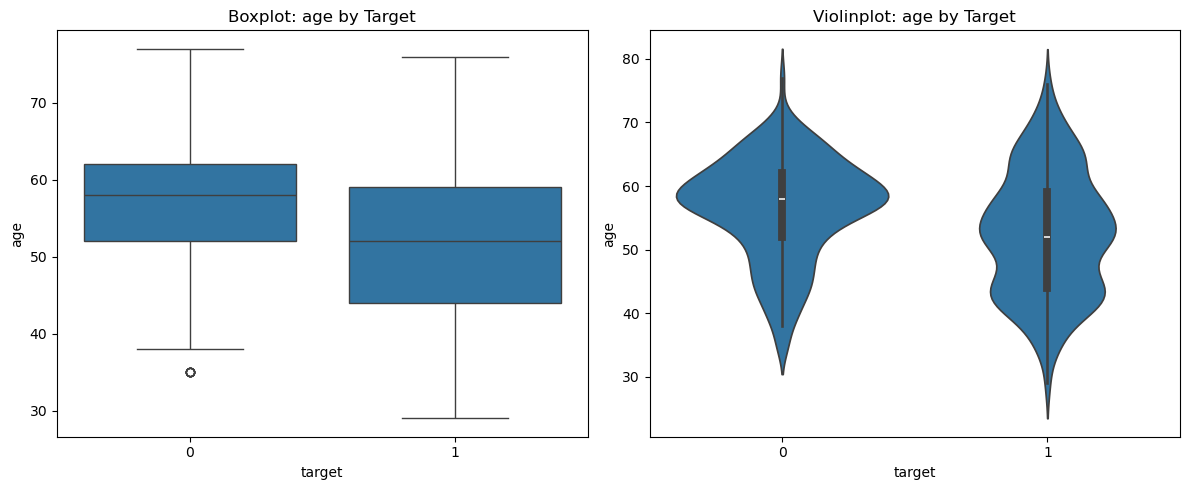

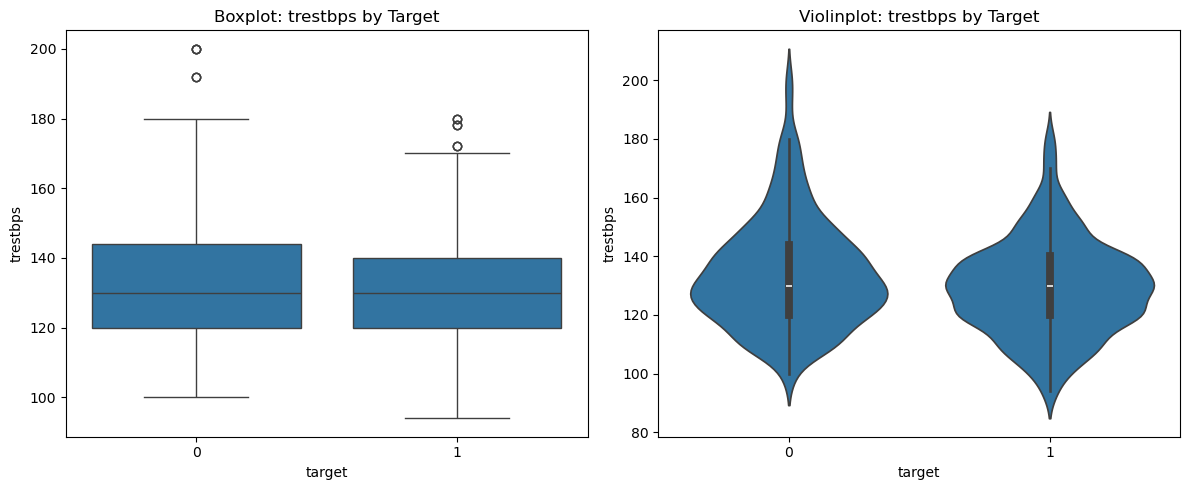

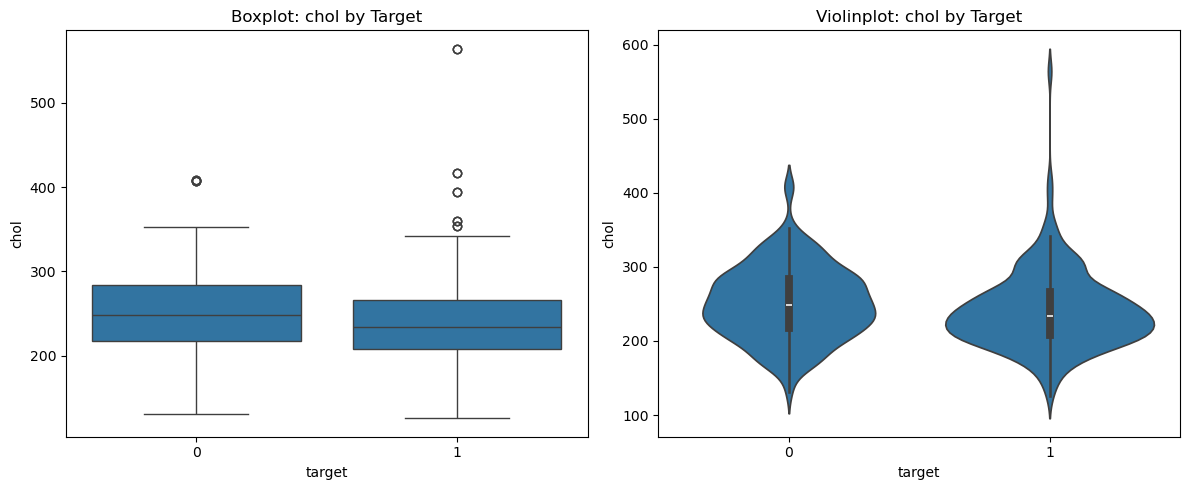

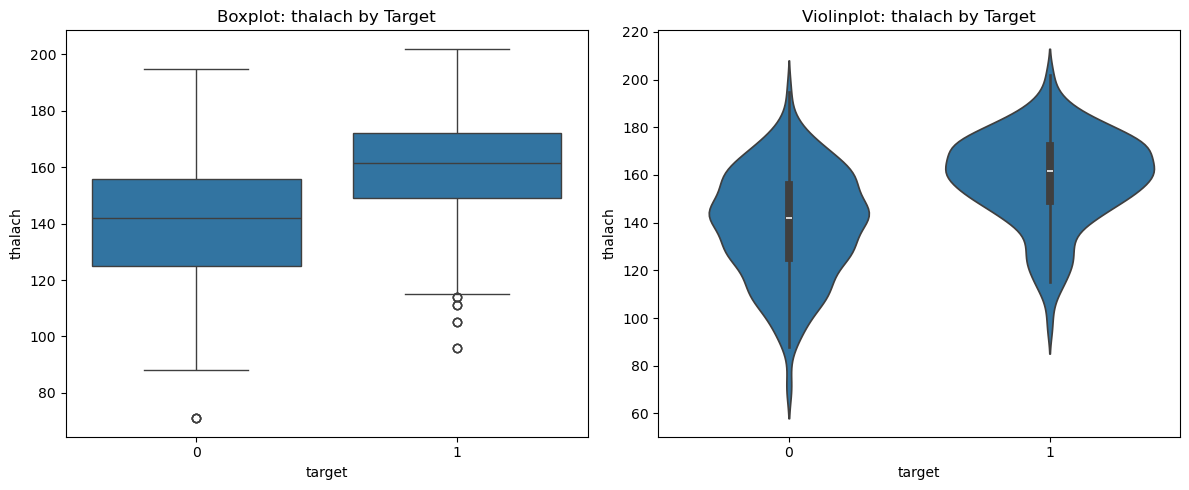

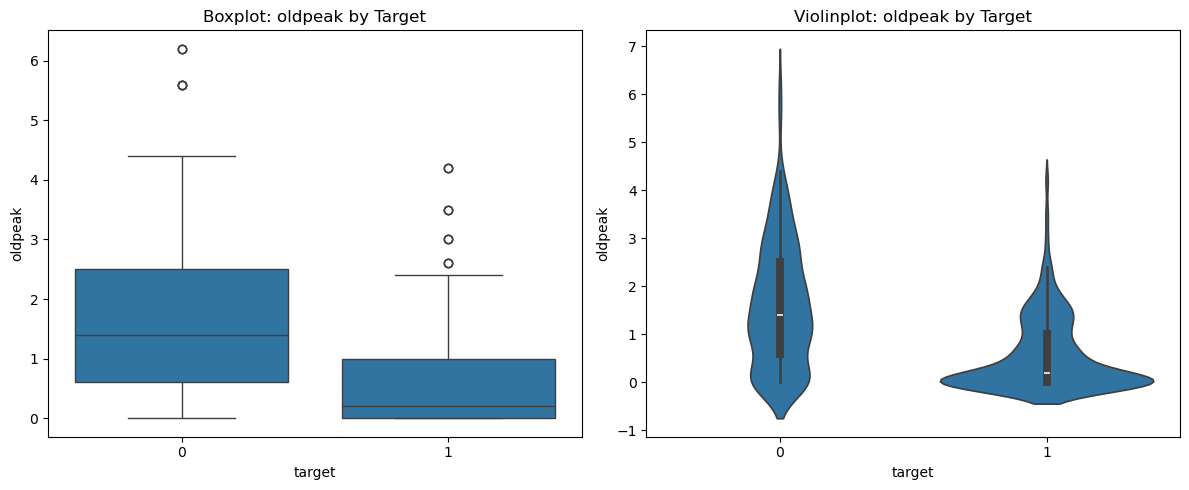

In [10]:
for num in num_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='target', y=num, data=heart)
    plt.title(f'Boxplot: {num} by Target')
    
    plt.subplot(1, 2, 2)
    sns.violinplot(x='target', y=num, data=heart)
    plt.title(f'Violinplot: {num} by Target')
    plt.tight_layout()
    plt.show()

# 5. Categorical vs Categorical: Crosstab + Heatmap

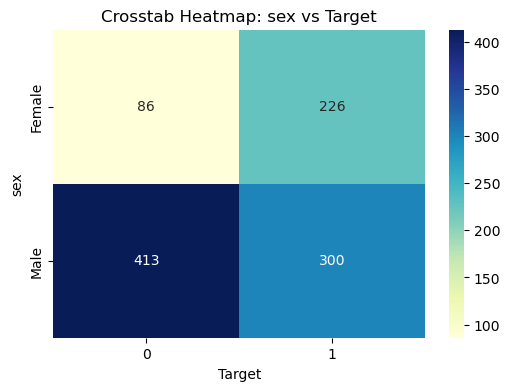

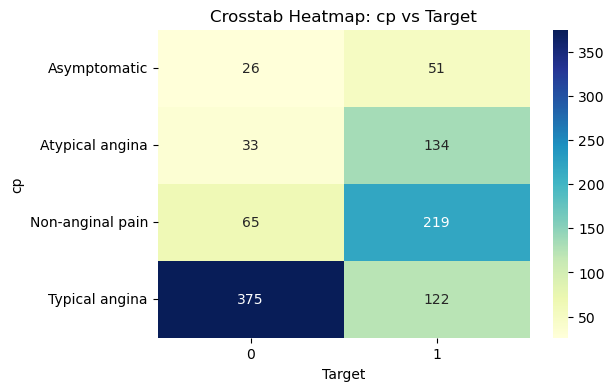

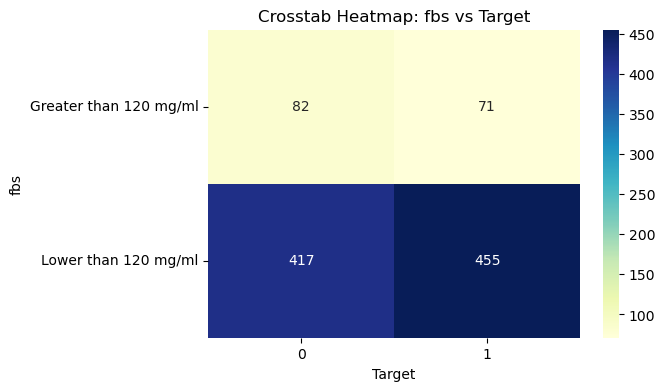

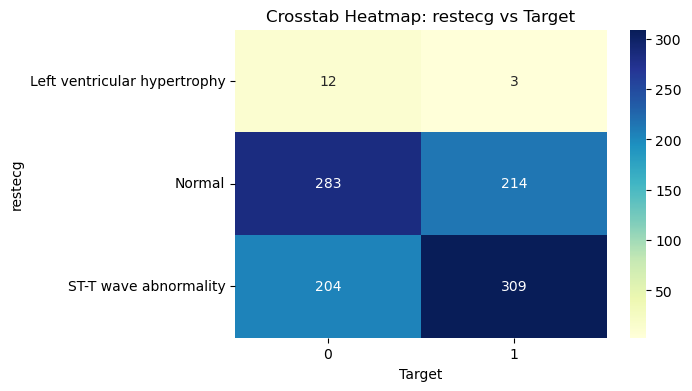

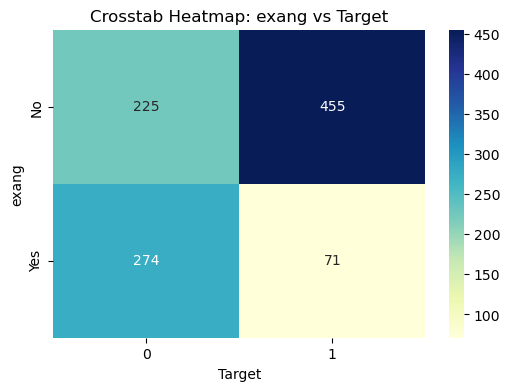

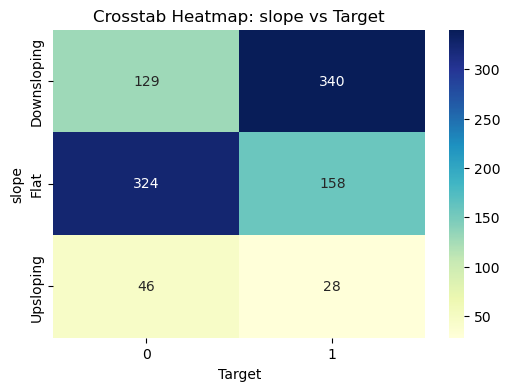

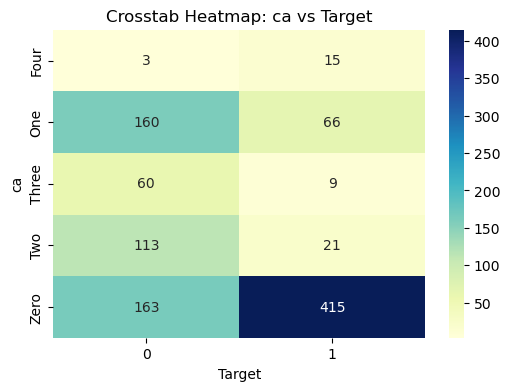

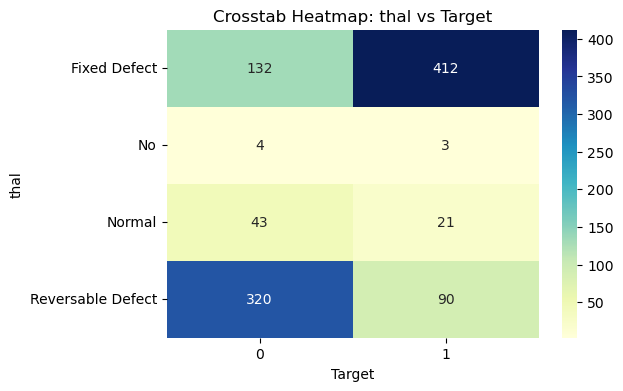

In [11]:
for col in cat_cols:
    if col != 'target':
        ctab = pd.crosstab(heart[col], heart['target'])
        plt.figure(figsize=(6, 4))
        sns.heatmap(ctab, annot=True, cmap='YlGnBu', fmt='d')
        plt.title(f'Crosstab Heatmap: {col} vs Target')
        plt.ylabel(col)
        plt.xlabel('Target')
        plt.show()

# 6. Correlation Matrix

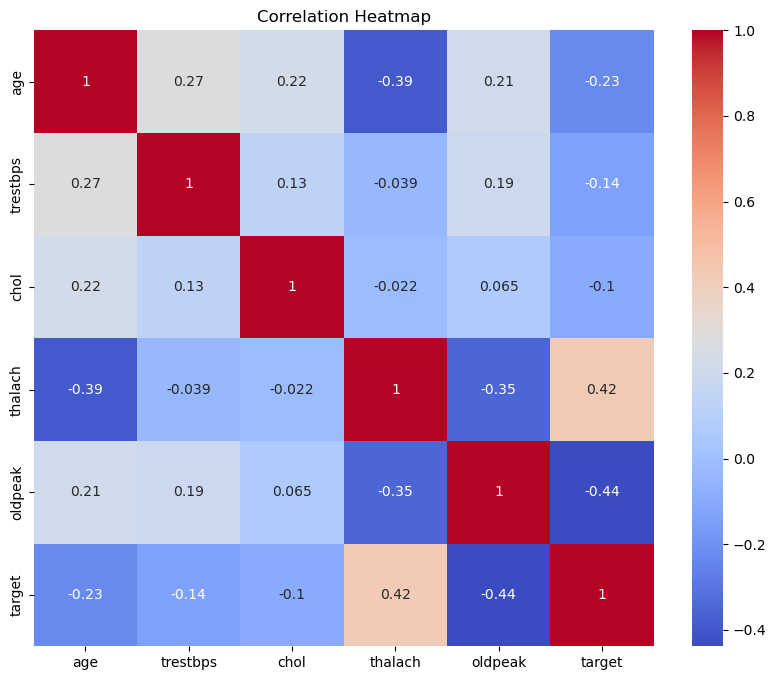

In [12]:
corr = heart.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 7. Outlier Detection: Z-Score + Boxplot

Number of outliers in age: 0


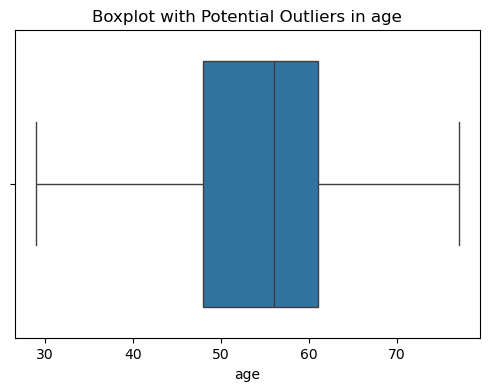

Number of outliers in trestbps: 7


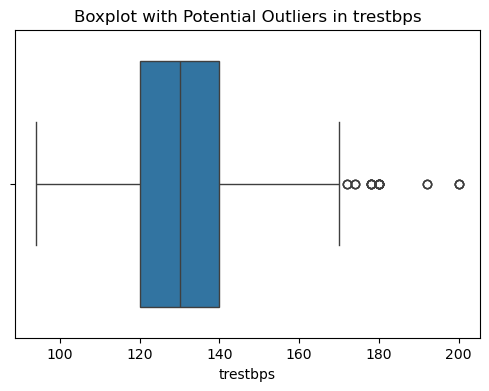

Number of outliers in chol: 13


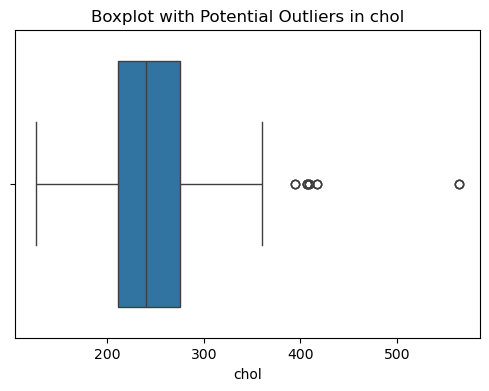

Number of outliers in thalach: 4


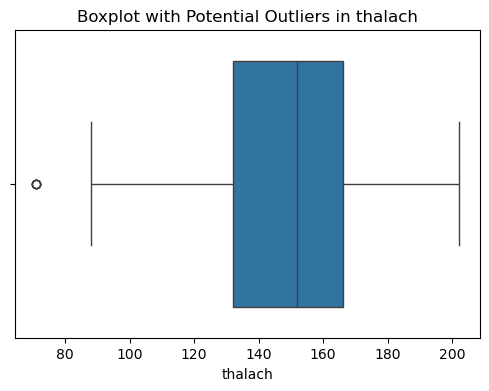

Number of outliers in oldpeak: 7


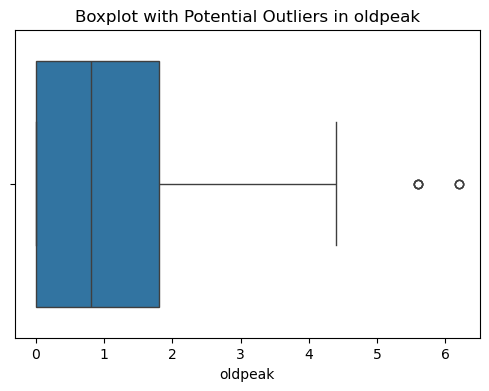

In [13]:
for col in num_cols:
    heart[f'{col}_z'] = zscore(heart[col])
    outliers = heart[heart[f'{col}_z'].abs() > 3]
    print(f'Number of outliers in {col}: {len(outliers)}')

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=heart[col])
    plt.title(f'Boxplot with Potential Outliers in {col}')
    plt.show()

In [14]:
# Clean up z-score columns
heart.drop(columns=[f'{col}_z' for col in num_cols], inplace=True)

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB
